# HOMEWORK 1

## Dynamic Study of the Correlation Matrix of constituents of NASDAQ-100 using PCA

--Shashank Gupta

### Environment setup

All the analysis in this has been done using the Python libraries 'Pandas' and 'SciPy'

First, we setup the Python dependencies:

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

sns.set(color_codes=True)
epsilon = 1e-4
%matplotlib inline

### Initialization of dataframe

Now, read the historical data into Pandas dataframe and index it by date. For convenience I have converted the xlsx file into csv.

In [2]:
df = pd.read_csv('data/NASDAQ_STOCKS_HISTORICAL_DATA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
# To see how the data looks like
df.head()

AAPL       QCOM       MSFT        GOOG       GILD       ORCL  \
Date                                                                            
2007-02-21  11.556712  34.420177  23.017885  237.692709  17.924041  15.732911   
2007-02-22  11.596875  35.025908  23.049255  237.687721  17.882990  15.796940   
2007-02-23  11.539870  35.492483  22.664970  235.075324  17.779160  15.385322   
2007-02-26  11.467316  34.911311  22.798293  232.233171  17.880577  15.385322   
2007-02-27  10.873933  32.946781  21.857188  224.161222  17.042689  14.900530   

                 CSCO       INTC       AMGN       CELG    ...        FMCN  \
Date                                                      ...               
2007-02-21  23.230828  15.262161  59.803865  27.059999    ...     41.1201   
2007-02-22  23.247798  15.327946  59.209458  27.434999    ...     40.3907   
2007-02-23  23.341129  15.174448  58.757009  28.139999    ...     41.2532   
2007-02-26  23.112044  15.240233  58.730388  28.610001    ...     40.9082   
2007-02-27  21.813900  14.640857  57.000417  26.584999    ...     38.5621   

                 SNDK   LEAP       STLD     DISCA        LVLT   AMLN  \
Date                                                                   
2007-02-21  38.563138  64.99  16.031841  8.400613  100.050001  40.64   
2007-02-22  37.692204  64.78  15.850199  8.313746   98.999999  40.58   
2007-02-23  37.372859  64.91  15.846251  8.277976   98.250003  40.15   
2007-02-26  36.985778  64.71  15.850199  8.308636  101.400003  40.85   
2007-02-27  35.718080  61.98  14.693221  8.119571   94.949999  39.20   

                 CDNS       LAMR      SIRI  
Date                                        
2007-02-21  21.160000  54.601085  3.831860  
2007-02-22  21.070000  55.463728  3.714558  
2007-02-23  20.969999  55.225474  3.655907  
2007-02-26  20.709999  54.165657  3.655907  
2007-02-27  20.000000  52.941530  3.567931  

[5 rows x 85 columns]

For the purpose of this analysis we are concerned with returns, so we will convert the closing price data into percentage returns for each stock.

In [3]:
df_returns = df.pct_change()
# The first row will only have 'NaN' values, so let's remove that row
df_returns = df_returns[1:]
# To see how the returns data looks like
df_returns.head()

AAPL      QCOM      MSFT      GOOG      GILD      ORCL  \
Date                                                                     
2007-02-22  0.003475  0.017598  0.001363 -0.000021 -0.002290  0.004070   
2007-02-23 -0.004916  0.013321 -0.016672 -0.010991 -0.005806 -0.026057   
2007-02-26 -0.006287 -0.016375  0.005882 -0.012090  0.005704  0.000000   
2007-02-27 -0.051746 -0.056272 -0.041280 -0.034758 -0.046860 -0.031510   
2007-02-28  0.008102  0.004236  0.010764  0.001515  0.013885  0.008594   

                CSCO      INTC      AMGN      CELG    ...         FMCN  \
Date                                                  ...                
2007-02-22  0.000730  0.004310 -0.009939  0.013858    ...    -0.017738   
2007-02-23  0.004015 -0.010014 -0.007641  0.025697    ...     0.021354   
2007-02-26 -0.009815  0.004335 -0.000453  0.016702    ...    -0.008363   
2007-02-27 -0.056167 -0.039329 -0.029456 -0.070780    ...    -0.057350   
2007-02-28  0.008946 -0.008487  0.000156  0.002445    ...     0.023775   

                SNDK      LEAP      STLD     DISCA      LVLT      AMLN  \
Date                                                                     
2007-02-22 -0.022585 -0.003231 -0.011330 -0.010341 -0.010495 -0.001476   
2007-02-23 -0.008472  0.002007 -0.000249 -0.004303 -0.007576 -0.010596   
2007-02-26 -0.010357 -0.003081  0.000249  0.003704  0.032061  0.017435   
2007-02-27 -0.034275 -0.042188 -0.072995 -0.022755 -0.063610 -0.040392   
2007-02-28 -0.013276  0.121329  0.014244  0.010698  0.037915  0.002551   

                CDNS      LAMR      SIRI  
Date                                      
2007-02-22 -0.004253  0.015799 -0.030612  
2007-02-23 -0.004746 -0.004296 -0.015789  
2007-02-26 -0.012399 -0.019191  0.000000  
2007-02-27 -0.034283 -0.022600 -0.024064  
2007-02-28 -0.003000 -0.006052  0.000000  

[5 rows x 85 columns]

### First Quarter Analysis

Let's just consider the first quarter, starting from 2007-02-22, to see how our analysis goes like. Then we'll run it for all quarters.

#### Dataframe extraction

First we extract the dataframe pertaining to the first quarter

In [4]:
start_date = datetime.date(2007, 2, 22)
end_date = start_date + relativedelta(months=3)

df_returns_quarter = df_returns[start_date:end_date]

# Remove NaN values
# It is possible that some stock's data is not available on certain dates, in case of which the value in our data
# vector will be NaN. We remove columns which have more than 2 such NaN values, and for those which have one or two
# we fill with zeroes (we assume the closing price was same the day before)
df_returns_quarter = df_returns_quarter.loc[:,df_returns_quarter.isnull().sum() <= 2]
df_returns_quarter = df_returns_quarter.fillna(value=0)

# To show how the dataframe looks like:
df_returns_quarter.head()

AAPL      QCOM      MSFT      GOOG      GILD      ORCL  \
Date                                                                     
2007-02-22  0.003475  0.017598  0.001363 -0.000021 -0.002290  0.004070   
2007-02-23 -0.004916  0.013321 -0.016672 -0.010991 -0.005806 -0.026057   
2007-02-26 -0.006287 -0.016375  0.005882 -0.012090  0.005704  0.000000   
2007-02-27 -0.051746 -0.056272 -0.041280 -0.034758 -0.046860 -0.031510   
2007-02-28  0.008102  0.004236  0.010764  0.001515  0.013885  0.008594   

                CSCO      INTC      AMGN      CELG    ...         FMCN  \
Date                                                  ...                
2007-02-22  0.000730  0.004310 -0.009939  0.013858    ...    -0.017738   
2007-02-23  0.004015 -0.010014 -0.007641  0.025697    ...     0.021354   
2007-02-26 -0.009815  0.004335 -0.000453  0.016702    ...    -0.008363   
2007-02-27 -0.056167 -0.039329 -0.029456 -0.070780    ...    -0.057350   
2007-02-28  0.008946 -0.008487  0.000156  0.002445    ...     0.023775   

                SNDK      LEAP      STLD     DISCA      LVLT      AMLN  \
Date                                                                     
2007-02-22 -0.022585 -0.003231 -0.011330 -0.010341 -0.010495 -0.001476   
2007-02-23 -0.008472  0.002007 -0.000249 -0.004303 -0.007576 -0.010596   
2007-02-26 -0.010357 -0.003081  0.000249  0.003704  0.032061  0.017435   
2007-02-27 -0.034275 -0.042188 -0.072995 -0.022755 -0.063610 -0.040392   
2007-02-28 -0.013276  0.121329  0.014244  0.010698  0.037915  0.002551   

                CDNS      LAMR      SIRI  
Date                                      
2007-02-22 -0.004253  0.015799 -0.030612  
2007-02-23 -0.004746 -0.004296 -0.015789  
2007-02-26 -0.012399 -0.019191  0.000000  
2007-02-27 -0.034283 -0.022600 -0.024064  
2007-02-28 -0.003000 -0.006052  0.000000  

[5 rows x 83 columns]

#### Eigenvalues and Eigenvectors calculation

Now we shall calculate the eigenvectors and eigenvalues for the correlation matrix of the dataframe. We will use the function 'linalg.eigh' from 'scipy' package

In [5]:
corr_matrix = df_returns_quarter.corr()
# To show how the correlation matrix looks like
corr_matrix.head()

AAPL      QCOM      MSFT      GOOG      GILD      ORCL      CSCO  \
AAPL  1.000000  0.298369  0.467631  0.499892  0.346818  0.583859  0.299669   
QCOM  0.298369  1.000000  0.257913  0.360197  0.389528  0.280190  0.358051   
MSFT  0.467631  0.257913  1.000000  0.509050  0.481007  0.595227  0.585475   
GOOG  0.499892  0.360197  0.509050  1.000000  0.559012  0.643715  0.467174   
GILD  0.346818  0.389528  0.481007  0.559012  1.000000  0.544347  0.361225   

          INTC      AMGN      CELG    ...         FMCN      SNDK      LEAP  \
AAPL  0.361369  0.141057  0.417719    ...     0.376367  0.279453  0.237405   
QCOM  0.340779  0.214259  0.328693    ...     0.313069  0.393341  0.255761   
MSFT  0.407751  0.352290  0.443736    ...     0.321539  0.174112  0.418319   
GOOG  0.488912  0.241454  0.427453    ...     0.397721  0.329375  0.325170   
GILD  0.494244  0.484155  0.589890    ...     0.228032  0.313569  0.464644   

          STLD     DISCA      LVLT      AMLN      CDNS      LAMR      SIRI  
AAPL  0.451429  0.283548  0.167640  0.263332  0.420236  0.339045  0.284678  
QCOM  0.371641  0.198748  0.274964  0.344626  0.390423  0.205096  0.124258  
MSFT  0.516033  0.361468  0.377988  0.366522  0.513241  0.302933  0.345672  
GOOG  0.473280  0.455776  0.371635  0.291432  0.571614  0.318005  0.249876  
GILD  0.529260  0.238267  0.353984  0.284736  0.453056  0.351063  0.098120  

[5 rows x 83 columns]

In [6]:
eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
# Make a list of (eigenvalue, eigenvector) tuples, and sort them by 
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Show the first three eigenvectors:
eig_pairs[0:3]

[(28.04363870325431,
  array([ 0.11194571,  0.09775004,  0.13249664,  0.14494953,  0.13094925,
          0.14075876,  0.12076637,  0.12534159,  0.07813318,  0.12042602,
          0.12358009,  0.13091253,  0.08733152,  0.12537963,  0.14570431,
          0.1205913 ,  0.07460895,  0.09822382,  0.09452159,  0.11783642,
          0.1318887 ,  0.10100383,  0.08965205,  0.08213789,  0.11896299,
          0.10538339,  0.07583436,  0.12252145,  0.09794931,  0.10560447,
          0.13822559,  0.13759472,  0.10938134,  0.10788471,  0.11198796,
          0.12932436,  0.05560723,  0.09339729,  0.13397534,  0.09912435,
          0.13053674,  0.12070982,  0.11580313,  0.10429857,  0.11814211,
          0.13617173,  0.10137129,  0.10033735,  0.12086396,  0.14169982,
          0.08294361,  0.04128911,  0.07799251,  0.09995335,  0.12903133,
          0.04902277,  0.10332847,  0.13308746,  0.13268193,  0.07420021,
          0.09973428,  0.10653126,  0.09517498,  0.14691728,  0.11262294,
          0.10367

#### Significant eigenvectors and Marchenko-Pasture Cutoff

Using the Marcenko-Pastur methodology we find a set of potentially admissible eigenvalues

In [7]:
# Gamma is given by N/T, where N is the number of iid random variables
gamma = float(df_returns_quarter.shape[1])/float(df_returns_quarter.shape[0])
mp_value_pos = (1 + math.sqrt(gamma))**2
mp_value_neg = (1 - math.sqrt(gamma))**2
print mp_value_pos, mp_value_neg

4.61307380188 0.0218468330424


In [8]:
# Find out the significant eigenvalue and eigenvectors pairs
sig_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos]
sig_eig_pairs

[(28.04363870325431,
  array([ 0.11194571,  0.09775004,  0.13249664,  0.14494953,  0.13094925,
          0.14075876,  0.12076637,  0.12534159,  0.07813318,  0.12042602,
          0.12358009,  0.13091253,  0.08733152,  0.12537963,  0.14570431,
          0.1205913 ,  0.07460895,  0.09822382,  0.09452159,  0.11783642,
          0.1318887 ,  0.10100383,  0.08965205,  0.08213789,  0.11896299,
          0.10538339,  0.07583436,  0.12252145,  0.09794931,  0.10560447,
          0.13822559,  0.13759472,  0.10938134,  0.10788471,  0.11198796,
          0.12932436,  0.05560723,  0.09339729,  0.13397534,  0.09912435,
          0.13053674,  0.12070982,  0.11580313,  0.10429857,  0.11814211,
          0.13617173,  0.10137129,  0.10033735,  0.12086396,  0.14169982,
          0.08294361,  0.04128911,  0.07799251,  0.09995335,  0.12903133,
          0.04902277,  0.10332847,  0.13308746,  0.13268193,  0.07420021,
          0.09973428,  0.10653126,  0.09517498,  0.14691728,  0.11262294,
          0.10367

Once we have the significant eigenvectors, project them out of the initial dataset.

To do this we create a 'projection' matrix, which is done by first creating a matrix whose columns are the relevant eigenvectors ('sig_eig_vec' here), and multiplying this matrix with its transpose.

This projection method comes from here - https://en.wikipedia.org/wiki/Projection_(linear_algebra)#Orthogonal_projections

In [9]:
df_returns_quarter_std = df_returns_quarter/df_returns_quarter.std()

sig_eig_vecs = np.array([ vec for val, vec in sig_eig_pairs])
sig_eig_vecs_proj_matrix = np.dot(sig_eig_vecs.T, sig_eig_vecs)

projection = pd.DataFrame(np.dot(df_returns_quarter_std, sig_eig_vecs_proj_matrix))
residual = pd.DataFrame(np.array(df_returns_quarter_std) - projection)
residual_corr = residual.corr()
#print residual_corr.head()
print sig_eig_vecs_proj_matrix

[[ 0.01253184  0.0109427   0.01483243 ...,  0.01571094  0.00929988
   0.0091117 ]
 [ 0.0109427   0.00955507  0.01295155 ...,  0.01371866  0.00812058
   0.00795626]
 [ 0.01483243  0.01295155  0.01755536 ...,  0.01859515  0.01100715
   0.01078442]
 ..., 
 [ 0.01571094  0.01371866  0.01859515 ...,  0.01969652  0.0116591
   0.01142318]
 [ 0.00929988  0.00812058  0.01100715 ...,  0.0116591   0.00690145
   0.0067618 ]
 [ 0.0091117   0.00795626  0.01078442 ...,  0.01142318  0.0067618
   0.00662497]]


In [10]:
res_eig_vals, res_eig_vecs = np.linalg.eigh(residual_corr)
res_eig_vals[-1]

5.2748678877970052

As can be seen above, we still have some eigenvalues which are above the Marcenko-Pastur limit (~4.6 in our case). Hence, we need to keep on projecting the eigenvectors out till there are no eigenvalues above the limit.

We shall do this in a loop:

In [11]:
data_matrix = df_returns_quarter_std

residual_matrix = None
end_reached = False
sig_eig_pairs = []

while not end_reached:
    corr_matrix = data_matrix.corr()
    eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    first_eigen_value = eig_pairs[0][0]
    if first_eigen_value <= mp_value_pos + epsilon:
        end_reached = True
        residual_matrix = data_matrix
        break
    # Extract out the eigenvector with the largest eigenvalue
    sig_eig_pairs.append(eig_pairs[0])
    first_eigen_vector = np.array([eig_pairs[0][1]])
    first_eig_vecs_proj_matrix = np.dot(first_eigen_vector.T, first_eigen_vector)
    
    projection = pd.DataFrame(np.dot(data_matrix, first_eig_vecs_proj_matrix))
    data_matrix = pd.DataFrame(np.array(data_matrix) - projection)
    data_matrix = data_matrix/data_matrix.std()

print 'No of eigenvectors extracted out: {}'.format(len(sig_eig_pairs))
print 'First eigenvalue: {}'.format(sig_eig_pairs[0][0])
print 'Eigenvalues of the residual: {}'.format(eig_values)


No of eigenvectors extracted out: 4
First eigenvalue: 28.0436387033
Eigenvalues of the residual: [ -8.69929635e-16  -7.38481246e-16  -6.42335777e-16  -5.55250847e-16
  -5.26616849e-16  -4.82322817e-16  -4.48893115e-16  -4.26496964e-16
  -3.76169735e-16  -3.41768733e-16  -2.35243167e-16  -1.83803458e-16
  -5.35145085e-17  -2.85588694e-17   5.19052980e-17   1.60368564e-16
   1.89581567e-16   2.37670981e-16   3.12492181e-16   3.46420800e-16
   4.36200135e-16   5.10894045e-16   6.14112330e-16   6.47634086e-16
   7.44905056e-16   4.77522633e-02   6.53197893e-02   9.31638053e-02
   9.81367902e-02   1.29393051e-01   1.44874630e-01   1.56167974e-01
   1.71701384e-01   1.90501437e-01   2.10059490e-01   2.39341327e-01
   2.51155717e-01   2.81452255e-01   2.90770721e-01   3.54950481e-01
   3.96541791e-01   4.36332669e-01   4.69516329e-01   5.90293088e-01
   6.05323379e-01   6.53173356e-01   6.98426657e-01   7.27887769e-01
   7.92174420e-01   8.92224764e-01   9.10117654e-01   1.04594727e+00
   1.0

The eigenvalues of the residual are all below the value given by Marcenko-Pastur. Let's plot their normalized histogram, along with an overlay of Marcenko-Pastur.

We will need to remove the values less than our precision tolerance (epsilon), since those come up due to degeneracy and precision errors.

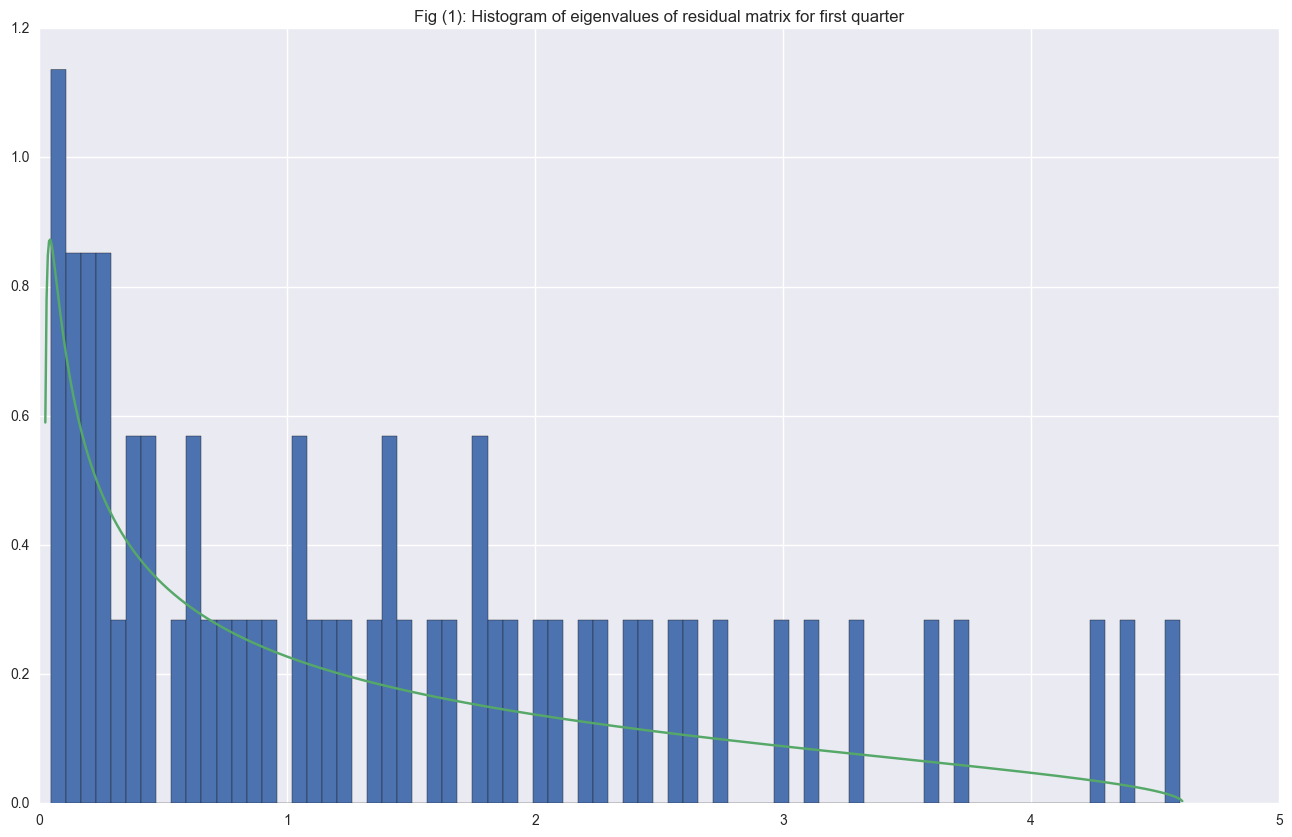

In [12]:
# Remove eigenvalues which are less then epsilon (our precision tolerance), since those generally exist because of 
# degeneracy and floating-point precision errors
res_eig_vals = np.array([val for val in eig_values if (val > epsilon)])
def eigden(lam, T, N):
    # Method for plotting Marchenko Pastur distribution
    # Taken from: https://anaconda.org/steve98654/ana_con_server_demo/notebook
    gamma = float(N)/float(T)
    lambda_plus = (1 + np.sqrt(gamma))**2
    lambda_minus = (1 - np.sqrt(gamma))**2
    return 1/(2 * np.pi * float(lam) * gamma) * np.sqrt((lambda_plus - lam) * (lam - lambda_minus))


plt.figure(figsize=(16,10))
plt.hist(res_eig_vals, bins=75, normed=True)

lamvls = np.linspace(0.0001,5,1000) 
plt.plot(lamvls,[eigden(lam, df_returns_quarter.shape[0], df_returns_quarter.shape[1]) for lam in lamvls])

plt.title('Fig (1): Histogram of eigenvalues of residual matrix for first quarter')
plt.show()

We get an approximate fit, with errors due to limited sample size and scaling of the histogram

However, if we look at the original set of eigen vectors, we noticed that the first eigenvalue is large (28.04) compared to the one after that (3.58). This shows **there's only one dominant factor which effectively accounts for most of the variance in the market**. As a result, while it took us 4 iterations to get the eigenvalues within the Marcenko-Pastur limit, in reality there was only one signicant eigenvector, and the rest didn't initially fit due to sampling and precision errors.

For the rest of the quarters we shall use a simple heuristic - **find the eigenvectors and simply count the ones for which the eigenvalue is greater than Marcenko-Pastur limit**.

### Analysis for all quarters

In this section we will carry out the analysis in a loop for all quarters from 2007-5-22 to 2017-2-21

For each quarter we will find the following values:

- First eigenvalue
- Number of significant eigenvalues
- Average volatility
- Returns of the first eigenportfolio
- Returns of the second eigenportfolio

In [13]:
start_date = datetime.date(2007, 2, 22)
end_date = start_date + relativedelta(months=3)
last_date = datetime.date(2017, 2, 17)

quarterly_observations = pd.DataFrame()

returns_first_eigen_portfolio = []
returns_second_eigen_portfolio = []

while (start_date < last_date):
    df_returns_quarter = df_returns[start_date:end_date]
    # Remove NaN values
    df_returns_quarter = df_returns_quarter.loc[:,df_returns_quarter.isnull().sum() <= 2]
    df_returns_quarter = df_returns_quarter.loc[:, (df_returns_quarter != 0).any(axis=0)]
    df_returns_quarter = df_returns_quarter.fillna(value=0)
    
    # Marcenko-Pasture value
    gamma = float(df_returns_quarter.shape[1])/float(df_returns_quarter.shape[0])
    mp_value_pos = (1 + math.sqrt(gamma))**2
    
    # Find the eigenvectors
    corr_matrix = df_returns_quarter.corr()
    eig_values, eig_vectors = np.linalg.eigh(corr_matrix)
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Get the eigenvector with the eigenvalues greater than MP cut-off value
    principal_eig_pairs = [(val, vec) for val, vec in eig_pairs if val > mp_value_pos - epsilon]
    principal_eig_vecs = np.array([ vec for val, vec in principal_eig_pairs])
    
    average_volatility = df_returns_quarter.std().sum()/df_returns_quarter.shape[1]
    # Storing the quarterly observations in a dataframe
    quarterly_observations = quarterly_observations\
                             .append({'Date': end_date,
                                      'first_eigenvalue/N':eig_pairs[0][0]/float(df_returns_quarter.shape[1]),
                                      'num_sig_eig_values': len(principal_eig_pairs),
                                      'average_volatility': average_volatility},
                                     ignore_index=True)
 
    # find the returns of first eigenportfolio
    df_quarter = df[(start_date - relativedelta(days=1)):end_date][df_returns_quarter.columns]

    weights = np.array(eig_pairs[0][1])/np.array(df_returns_quarter.std())
    weights = weights/math.sqrt(eig_pairs[0][0])
    df_value_first_eigenportfolio = df_quarter.dot(weights)
    df_returns_first_eigenportfolio = df_value_first_eigenportfolio.pct_change()[1:]*100
    returns_first_eigen_portfolio.append(df_returns_first_eigenportfolio)
    
    # find the returns of second eigenportfolio
    weights = np.array(eig_pairs[1][1])/np.array(df_returns_quarter.std())
    weights = weights/math.sqrt(eig_pairs[1][0])
    df_value_second_eigenportfolio = df_quarter.dot(weights)
    df_returns_second_eigenportfolio = df_value_second_eigenportfolio.pct_change()[1:]*100
    returns_second_eigen_portfolio.append(df_returns_second_eigenportfolio)
        
    # increment start_date and end_date for the next loop
    start_date = end_date
    end_date = start_date + relativedelta(months=3)
         

After this loop we have figured out the required observations in three dataframes - 
- 'quarterly observations', which has the average volatility, first eigenvalue, and number of significant eigen values
- 'returns_first_eigen_portfolio', which has the returns of the first eigenportfolio
- 'returns_second_eigen_portfolio', which has the returns of the second eigenportfolio

#### Quaterly observations ####

Let's plot the quaterly observations first:

In [14]:
quarterly_observations['Date'] = pd.to_datetime(quarterly_observations['Date'])
quarterly_observations = quarterly_observations.set_index('Date')
# To see how the data looks like
quarterly_observations.head()

average_volatility  first_eigenvalue/N  num_sig_eig_values
Date                                                                  
2007-05-22            0.017212            0.337875                 1.0
2007-08-22            0.020803            0.300653                 2.0
2007-11-22            0.023973            0.347511                 1.0
2008-02-22            0.028127            0.342470                 2.0
2008-05-22            0.026909            0.420338                 1.0

In [15]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")

plt.figure(figsize=(100,60))
fig, ax1 = plt.subplots()

lns1 = ax1.plot(quarterly_observations['average_volatility'], label='Average Volatility', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Volatility', color='b')

ax2 = ax1.twinx()
lns2 = ax2.plot(quarterly_observations['first_eigenvalue/N'], label='First Eigenvalue/N', color='r')
ax2.set_ylabel('First Eigenvalue/N', color='r')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.spines['right'].set_smart_bounds(True)
lns3 = ax3.plot(quarterly_observations['num_sig_eig_values'], label='Number of significant eigenvalues', color='g')
ax3.set_ylabel('Number of significant eigenvalues', color='g')
ax3.set_ylim(0, 5)

# set the legend
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, frameon=True)

plt.title('Fig (2): Quaterly observations')
plt.draw()

#### First and Second Eigenportfolios

Next we shall plot the returns of the first and second eigenportfolios, and try to compare it with the returns of Apple, NASDAQ-100 (NDX) ticker, and QQQ ETF.

In [16]:
# Concat the returns of the first and second eigenportfolios
portfolio_returns = pd.concat([pd.concat(returns_first_eigen_portfolio), pd.concat(returns_second_eigen_portfolio)],
                              axis=1)
portfolio_returns.columns = ['first', 'second']
portfolio_returns.head()

first    second
Date                          
2007-02-22  0.093649 -2.608131
2007-02-23 -0.299526 -3.538948
2007-02-26 -0.601584 -0.943355
2007-02-27 -3.726589 -5.529621
2007-02-28  0.379525  4.301848

##### Comparison with AAPL #####

In [17]:
# Extract the returns of AAPL
portfolio_returns['AAPL'] = df_returns['AAPL']*100
portfolio_returns.head()

first    second      AAPL
Date                                    
2007-02-22  0.093649 -2.608131  0.347530
2007-02-23 -0.299526 -3.538948 -0.491555
2007-02-26 -0.601584 -0.943355 -0.628725
2007-02-27 -3.726589 -5.529621 -5.174559
2007-02-28  0.379525  4.301848  0.810204

Let's plot the returns of first eigenportfolio, second eigenportfolio, and AAPL on the same graph:

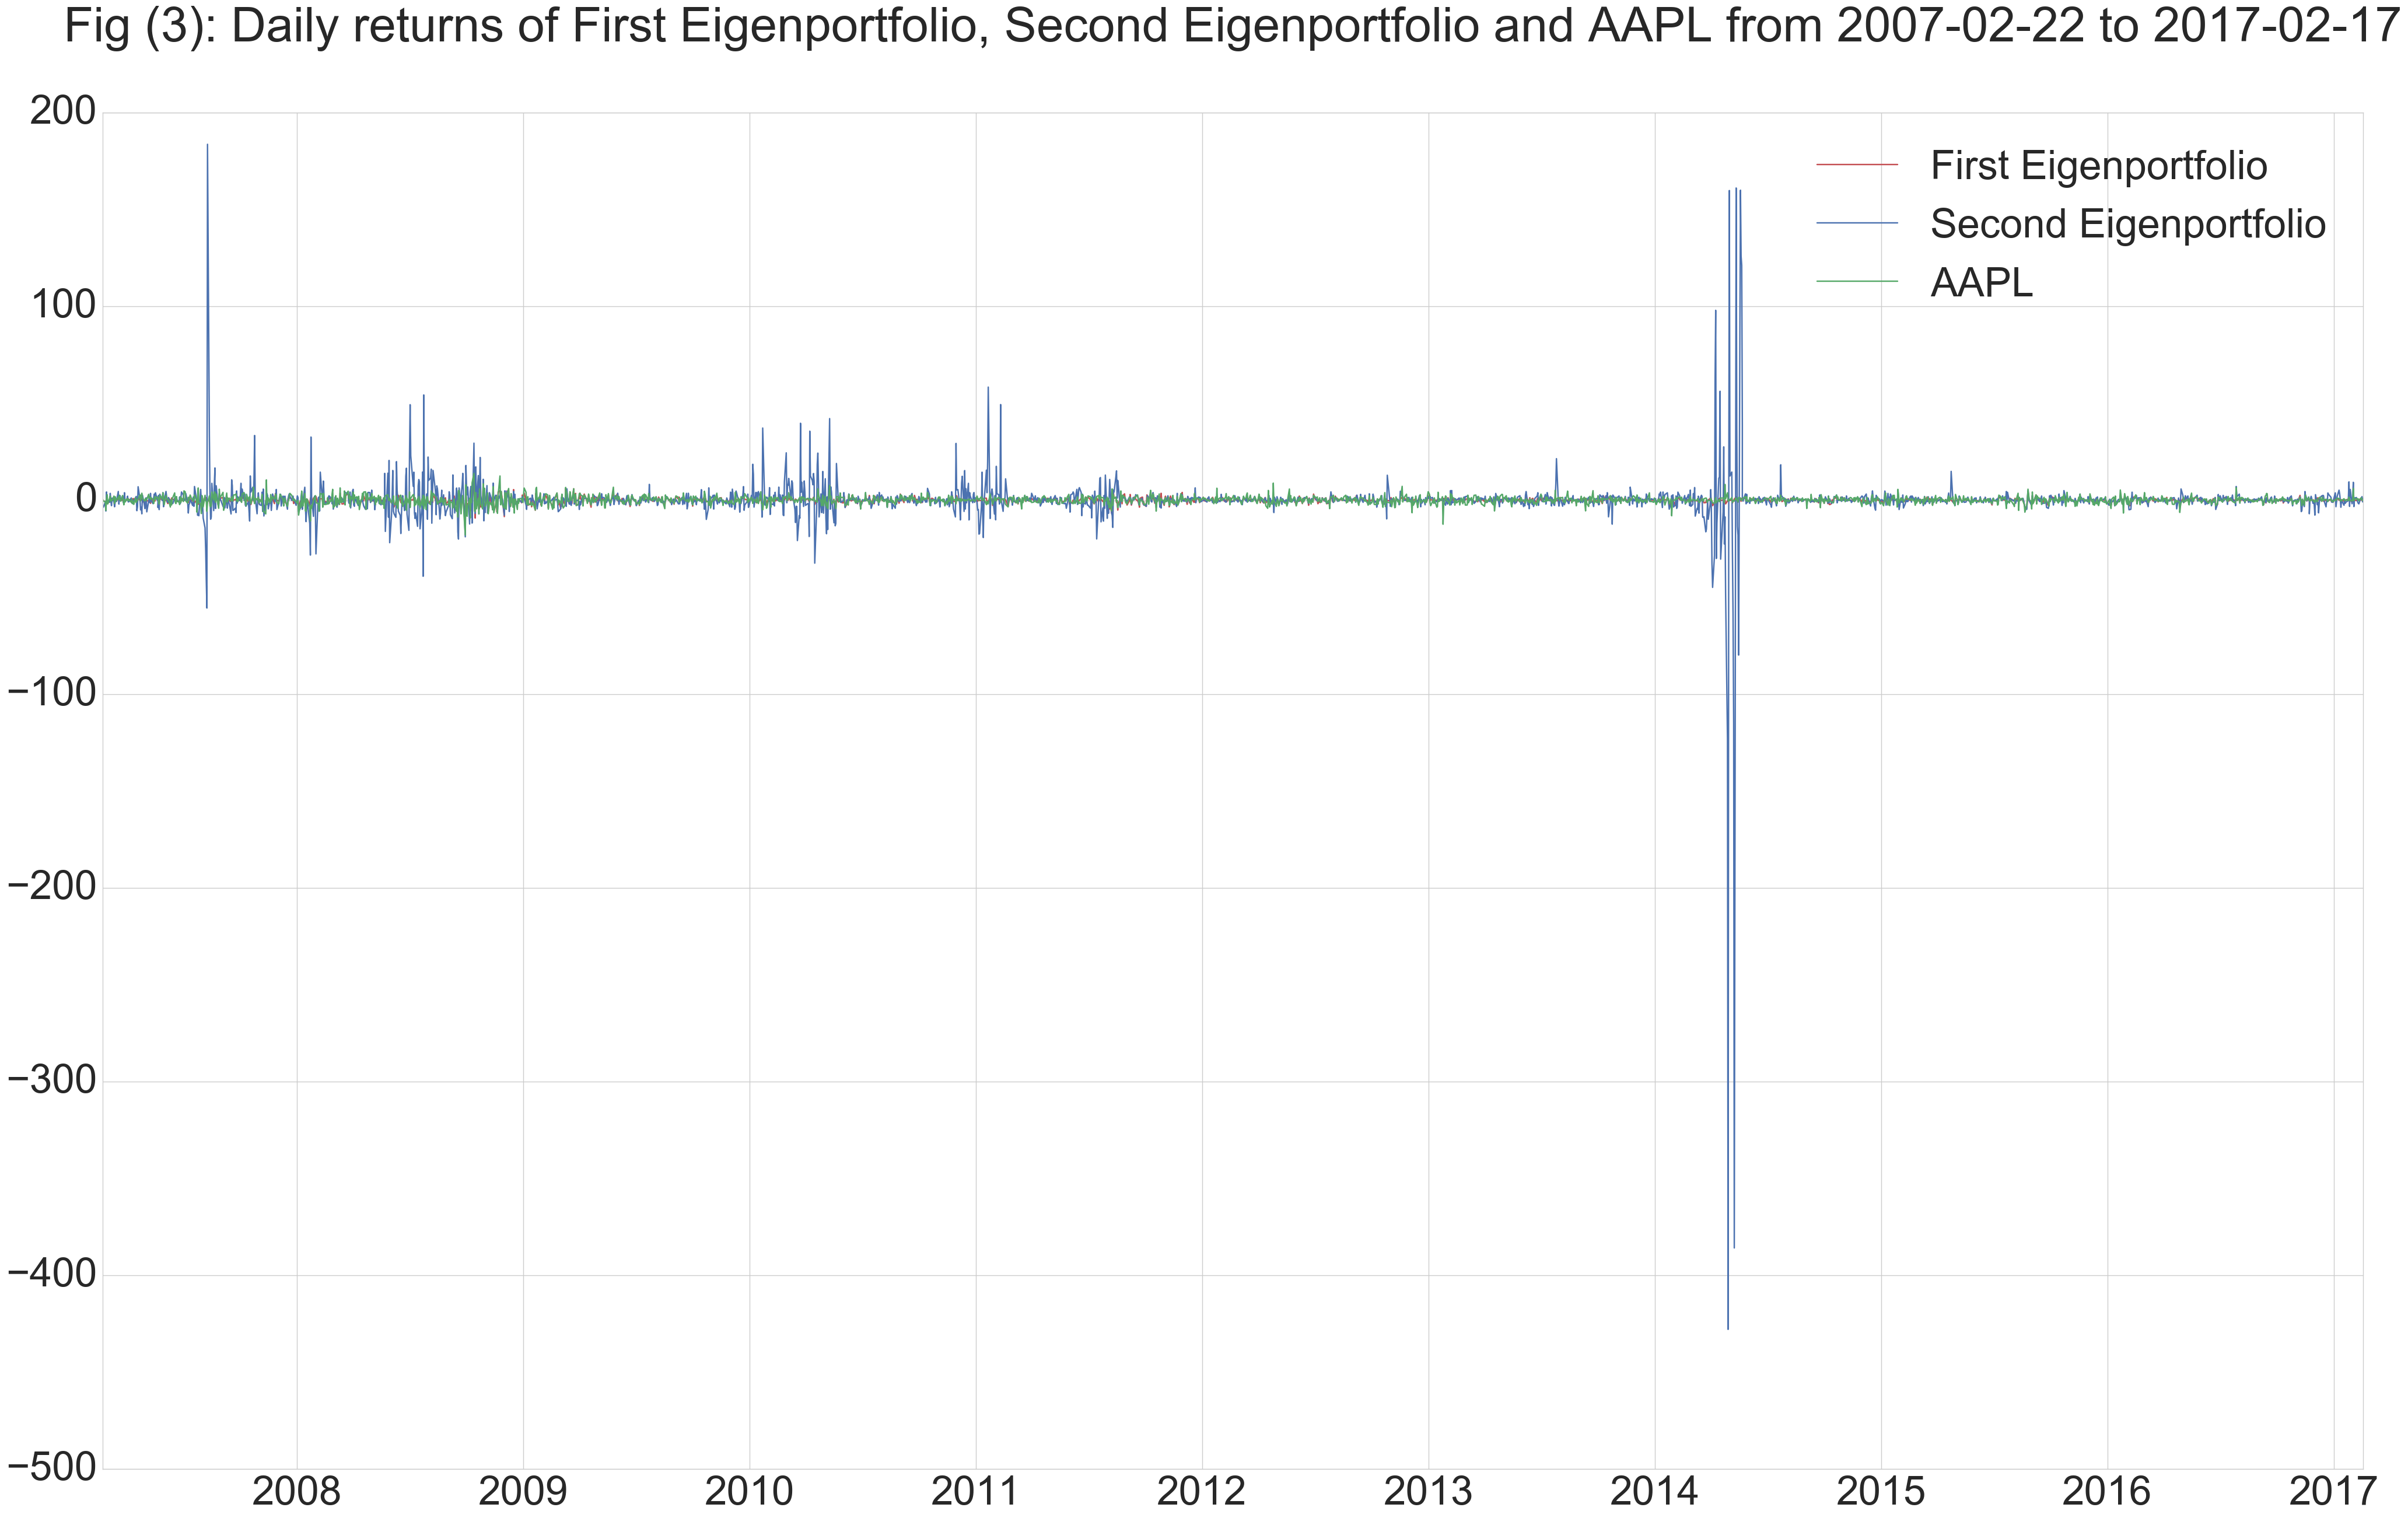

In [18]:
sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns['first'], label='First Eigenportfolio', color='r')
ax.plot(portfolio_returns['second'], label='Second Eigenportfolio', color='b')
ax.plot(portfolio_returns['AAPL'], label='AAPL', color='g')

size = fig.get_size_inches()*fig.dpi
plt.title('Fig (3): Daily returns of First Eigenportfolio, Second Eigenportfolio and AAPL from 2007-02-22 to 2017-02-17')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

We observe that plot seems distorted due to the presence of variations in returns of second eigenporfolio. To better visualize the data we can normalize the returns to see how they vary together.

In [19]:
portfolio_returns_std = portfolio_returns/portfolio_returns.std()

fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns_std['first'], label='First Eigenportfolio (Normalized)', color='r')
ax.plot(portfolio_returns_std['second'], label='Second Eigenportfolio (Normalized)', color='b')
ax.plot(portfolio_returns_std['AAPL'], label='AAPL (Normalized)', color='g')

plt.title('Fig (4): Normalized daily returns of First Eigenportfolio, Second Eigenportfolio and AAPL from 2007-02-22'
          ' to 2017-02-17')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

The above plot indicates that the first eigenportfolio and AAPL seem to be moving together, and second eigenportfolio moves in the opposite direction.

To get a better sense of this let's only consider a segment of the dataframe, from 2008-01-01 to 2010-01-01 

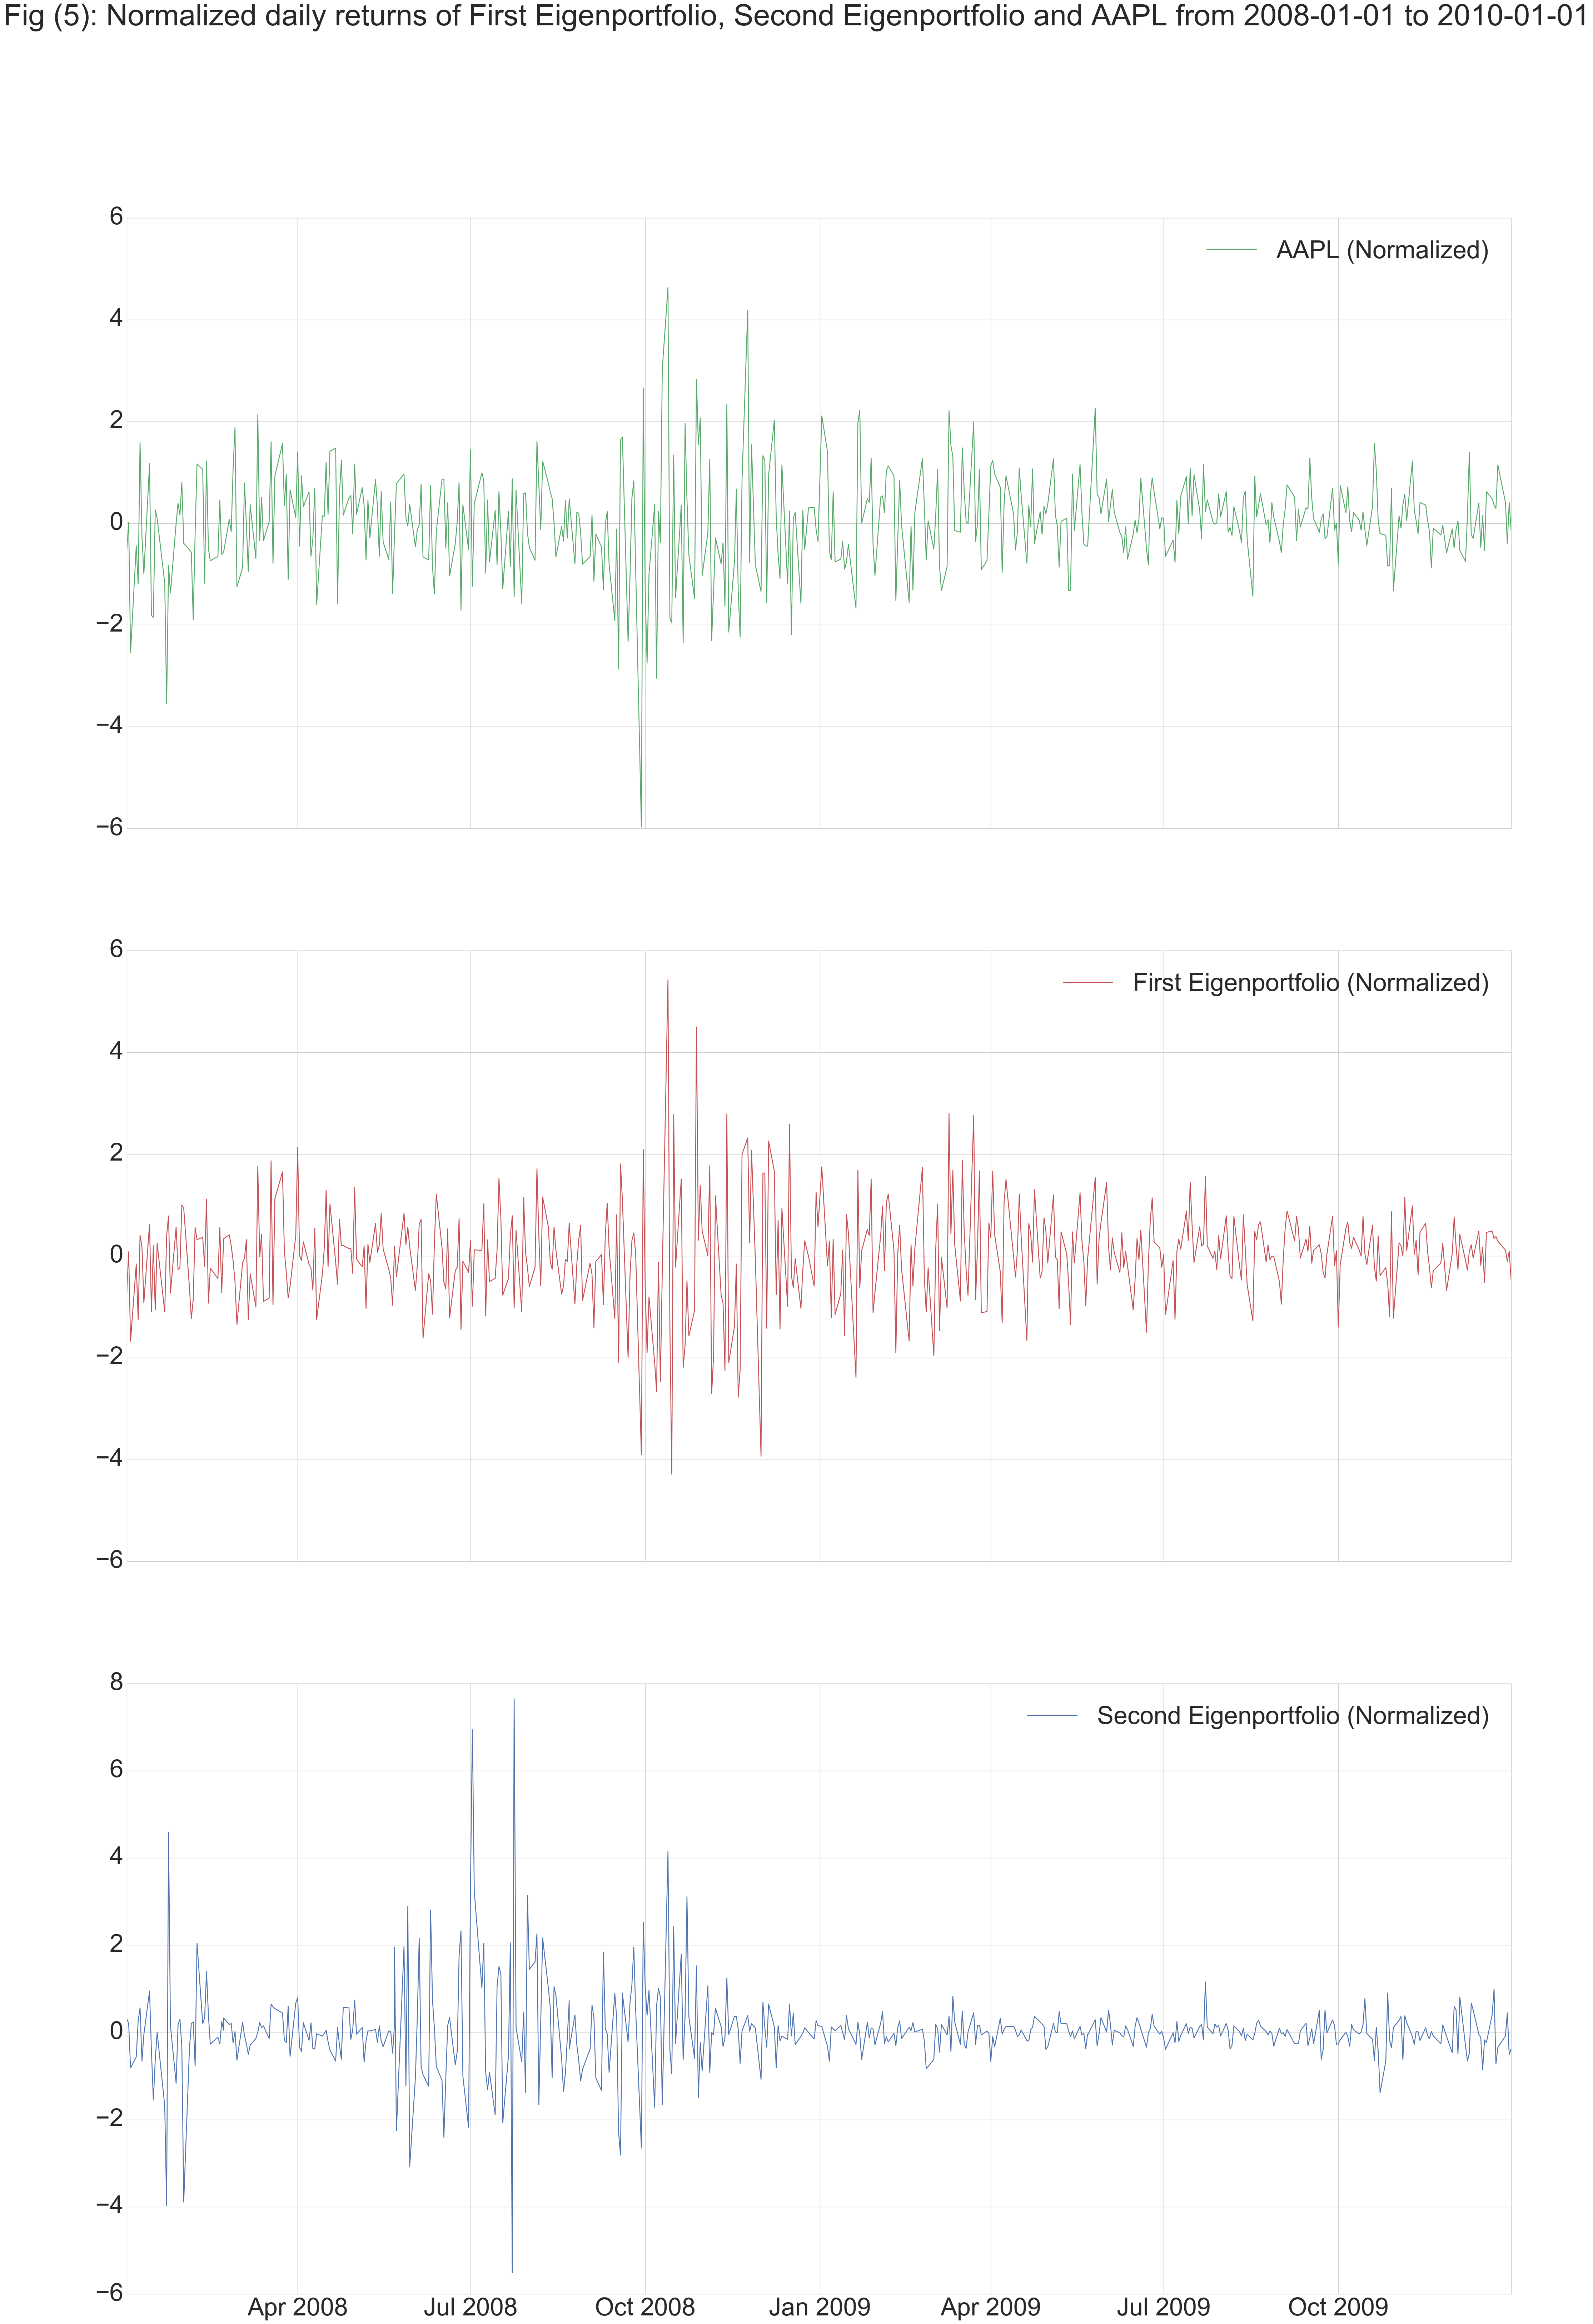

In [20]:
start_date = datetime.date(2008, 1, 1)
end_date = datetime.date(2010, 1, 1)

portfolio_returns_segment = portfolio_returns[start_date:end_date]
portfolio_returns_segment_std = portfolio_returns_segment/portfolio_returns_segment.std()

fig, ax = plt.subplots(3, figsize=(50, 75), sharex=True)
ax[0].plot(portfolio_returns_segment_std['AAPL'], label='AAPL (Normalized)', color='g')
ax[0].legend(loc='best')

ax[1].plot(portfolio_returns_segment_std['first'], label='First Eigenportfolio (Normalized)', color='r')
ax[1].legend(loc='best')

ax[2].plot(portfolio_returns_segment_std['second'], label='Second Eigenportfolio (Normalized)', color='b')

ax[2].legend(loc='best')

plt.suptitle('Fig (5): Normalized daily returns of First Eigenportfolio, Second Eigenportfolio and AAPL from 2008-01-01'
          ' to 2010-01-01')

plt.legend(loc='best')
plt.draw()

In [21]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns_segment_std['first'], label='First Eigenportfolio (Normalized)', color='b')
ax.plot(portfolio_returns_segment_std['AAPL'], label='AAPL (Normalized)', color='g')

plt.title('Fig (6): Normalized daily returns of First Eigenportfolio and AAPL from 2008-01-01 to 2010-01-01')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

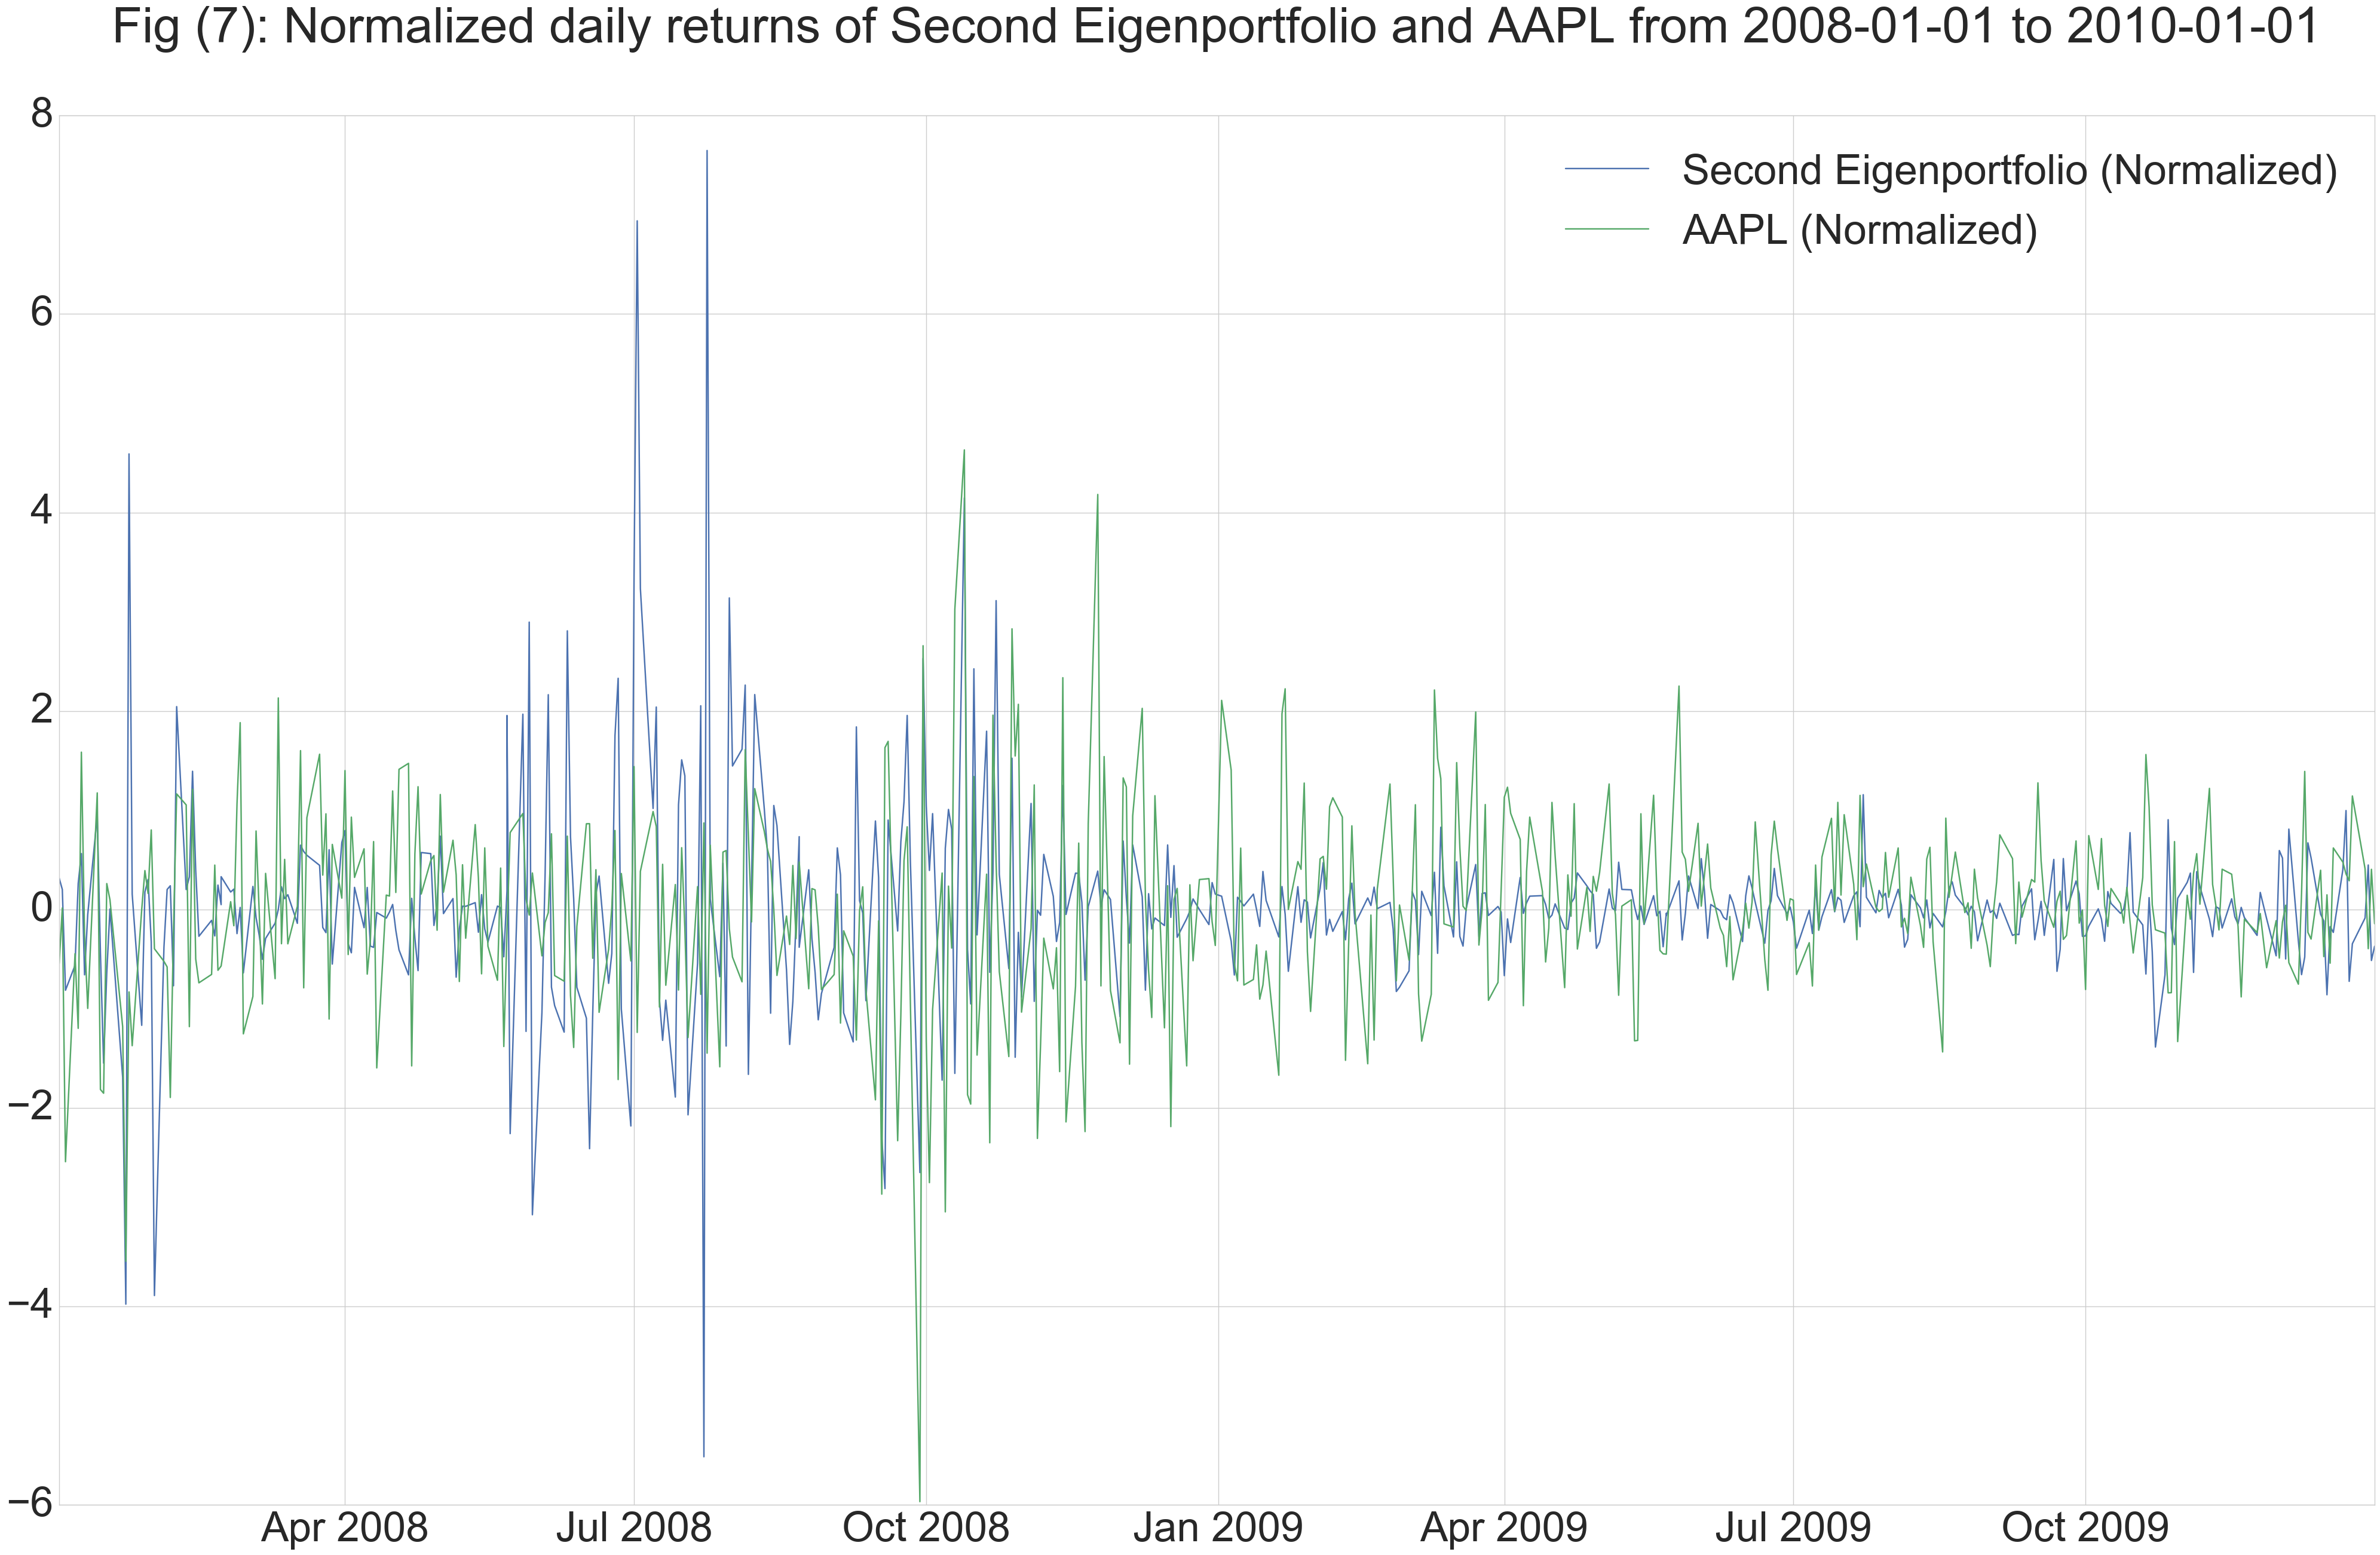

In [22]:
fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns_segment_std['second'], label='Second Eigenportfolio (Normalized)', color='b')
ax.plot(portfolio_returns_segment_std['AAPL'], label='AAPL (Normalized)', color='g')

plt.title('Fig (7): Normalized daily returns of Second Eigenportfolio and AAPL from 2008-01-01 to 2010-01-01')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

The graph between First Eigenportfolio and AAPL seem to indicate they have high correlation, while the one between Second Eigenportfolio and AAP indicate they move in orthogonal direction.

Let's try to visualize that using a scatter plot of the whole timeseries data:

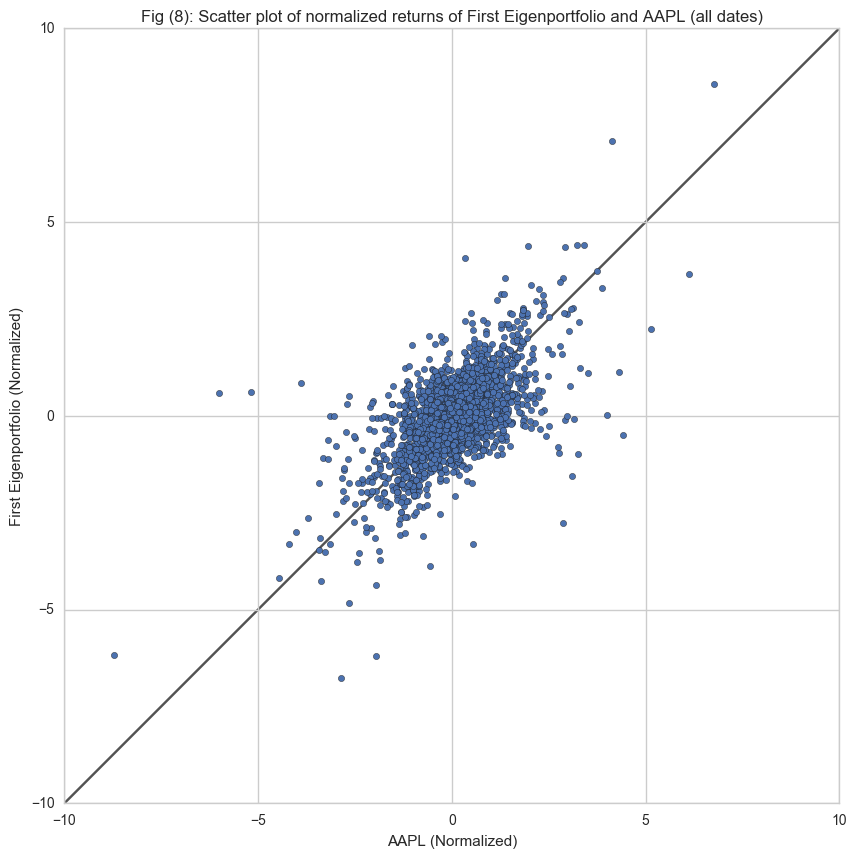

In [23]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(portfolio_returns_std['AAPL'], portfolio_returns_std['first'])
scax.set_xlabel('AAPL (Normalized)')
scax.set_ylabel('First Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)


plt.title('Fig (8): Scatter plot of normalized returns of First Eigenportfolio and AAPL (all dates)')
plt.draw()

In [24]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(portfolio_returns_std['AAPL'], portfolio_returns_std['second'])

scax.set_xlabel('AAPL (Normalized)')
scax.set_ylabel('Second Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)

plt.title('Fig (9): Scatter plot of normalized returns of Second Eigenportfolio and AAPL (all dates)')
plt.draw()

Indeed, for the first eigenportfolio and AAPL the plot is heavily around X=Y line, while for the second eigenportfolio it seems to be around X=0 and Y=0

##### Comparison with  NDX and QQQ #####

Next, let's compare the returns of the first and second eigenportfolios with NASDAQ-100 index (NDX) and QQQ (the ETF for Nasdaq-100), to see how they compare to the returns of a market-weighter portfolio

In [25]:
import pandas_datareader.data

start = datetime.date(2007, 2, 21)
end = datetime.date(2017,2, 17)

ndx_data = pandas_datareader.data.DataReader("NDX", 'yahoo', start, end)
ndx_returns = ndx_data['Adj Close'].pct_change()[1:]*100

qqq_data = pandas_datareader.data.DataReader("QQQ", 'yahoo', start, end)
qqq_returns = qqq_data['Adj Close'].pct_change()[1:]*100

sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns['first'], label='First Eigenportfolio', color='r')
ax.plot(portfolio_returns['second'], label='Second Eigenportfolio', color='y')
ax.plot(ndx_returns, label='NDX', color='b')
ax.plot(qqq_returns, label='QQQ', color='g')

plt.title('Fig (10): Daily returns of First Eigenportfolio, Second Eigenportfolio, NDX and QQQ')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

Again, the presence of variations causes the distortions in the plot. To better visualize the data we can normalize the returns and see only the variations between the dates 2008-01-01 to 2010-01-01:

In [26]:
start_date = datetime.date(2008, 1, 1)
end_date = datetime.date(2010, 1, 1)

ndx_returns_segment = ndx_returns[start_date:end_date]
ndx_returns_segment_std = ndx_returns_segment/ndx_returns_segment.std()

qqq_returns_segment = qqq_returns[start_date:end_date]
qqq_returns_segment_std = qqq_returns_segment/qqq_returns_segment.std()

sns.set(font_scale=5)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(50, 30))
ax.plot(portfolio_returns_segment_std['first'], label='First Eigenportfolio (Normalized)', color='r')
ax.plot(portfolio_returns_segment_std['second'], label='Second Eigenportfolio (Normalized)', color='y')
ax.plot(ndx_returns_segment_std, label='NDX (Normalized)', color='b')
ax.plot(qqq_returns_segment_std, label='QQQ (Normalized)', color='g')


plt.title('Fig (11): Normalized daily returns of First Eigenportfolio, Second Eigenportfolio, NDX and QQQ '
         ' from 2008-01-01 to 2010-01-01')
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.legend(loc='best')
plt.draw()

The plot seems to be indicating the first eigenportfolio, NDX and QQQ seem to be moving together. Again let's do a scatter plot over the complete timeseries data to better visualize it:

In [27]:
ndx_returns_std = ndx_returns[portfolio_returns_std['first'].index]
ndx_returns_std = ndx_returns_std/ndx_returns_std.std()

sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(ndx_returns_std, portfolio_returns_std['first'])
scax.set_xlabel('NDX (Normalized)')
scax.set_ylabel('First Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)

plt.title('Fig (12): Scatter plot of normalized returns of First Eigenportfolio and NDX (all dates)')
plt.draw()

The scatter plots seem to indicate there's a linear relationship between NDX and first eigenportfolio

In [28]:
qqq_returns_std = qqq_returns[portfolio_returns_std['first'].index]
qqq_returns_std = qqq_returns_std/qqq_returns_std.std()

sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(qqq_returns_std, portfolio_returns_std['first'])
scax.set_xlabel('QQQ (Normalized)')
scax.set_ylabel('First Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)

plt.title('Fig (13): Scatter plot of normalized returns of First Eigenportfolio and QQQ (all dates)')

plt.draw()

The scatter plots seem to indicate first eigenportfolio and QQQ closely follow each other.

Let's do the same scatter plots for the second eigenportfolio:

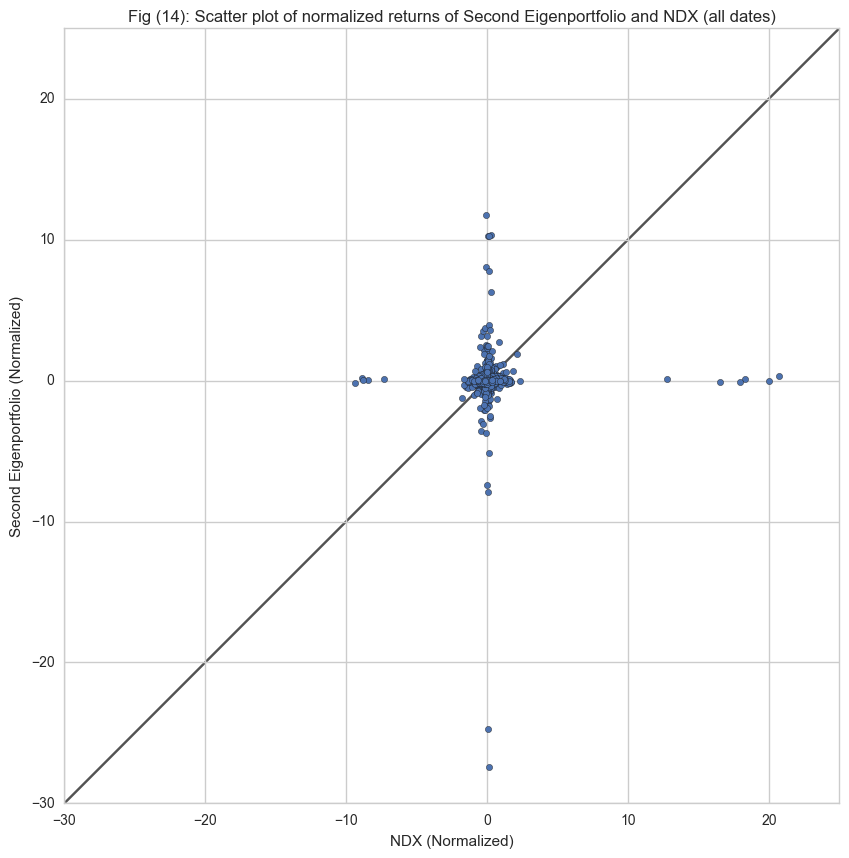

In [29]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(ndx_returns_std, portfolio_returns_std['second'])
scax.set_xlabel('NDX (Normalized)')
scax.set_ylabel('Second Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)

plt.title('Fig (14): Scatter plot of normalized returns of Second Eigenportfolio and NDX (all dates)')
plt.draw()

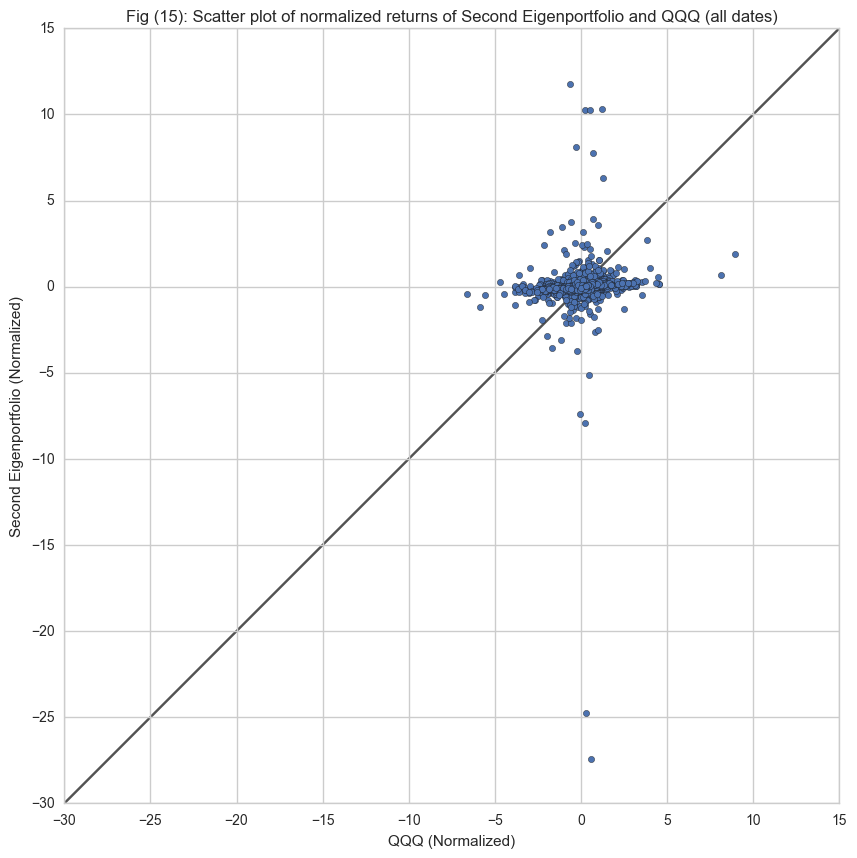

In [30]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
fig, scax = plt.subplots(figsize=(10, 10))
scax.scatter(qqq_returns_std, portfolio_returns_std['second'])
scax.set_xlabel('QQQ (Normalized)')
scax.set_ylabel('Second Eigenportfolio (Normalized)')

lims = [
    np.min([scax.get_xlim(), scax.get_ylim()]),  # min of both axes
    np.max([scax.get_xlim(), scax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
scax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
scax.set_aspect('equal')
scax.set_xlim(lims)
scax.set_ylim(lims)

plt.title('Fig (15): Scatter plot of normalized returns of Second Eigenportfolio and QQQ (all dates)')

plt.draw()

## Summary ##

Looking at the plots we have made till now, a few interesting observations about the behaviour can be made:

1. **Quaterly observations** 
From figure (2), which has all the quaterly observations, we can see that average volatility and the first eigenvalue seem to be following each other closely, that is, whenever average volatility goes up the first eigenvalue also goes up.  
The number of significant eigenvectors show the opposite behaviour, that is, when volatility is low the number of significant eigenvectors goes up to two or three, otherwise it's just one.  
  
2. **Comparison with AAPL**   
From figures (5) - (9), we can see the first eigenportfolio seems to be highly positively correlated with AAPL, with the scatter plot a bit near the X=Y line. This indicates the first eigenportfolio is relatively stable, and seems to be following AAPL  
The second eigenportfolio, however, seems to be orthogonal to the AAPL stock, with the scatter plot along X=0 or Y=0. This also indicates it is fairly stable, as we don't see much values along any other line.

3. **Comparison with NDX and QQQ**   
From figures (10) - (15), we can see the first eigenportfolio again is highly correlated with both NDX and QQQ. The scatter plot with NDX is Y=kX line, while the scatter plot with QQQ seems to be a perfect X=Y line. This again indicates the first eigenportfolio is relatively stable, and is *closely related to a market-cap-weighted portfolio*  
The second eigenportfolio, again, seems to be orthogonal to the both NDX and QQQ, with the scatter plot along X=0 or Y=0. This again indicates it moves *orthogonal to a market-cap-weighted portfolio*.
